<br>

# 🌲 **PREDICTING DIABETES** 🌲

**DECISION TREE ALGORITHM**

## **INDEX**
- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**

<br>

### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

<br>

**1.1. PROBLEM DEFINITION** 


Diabetes is a chronic health condition that affects millions of people worldwide. Early detection and diagnosis of diabetes are crucial for effective management and prevention of complications. In this study, we aim to develop a predictive model that can accurately identify individuals at risk of developing diabetes based on a set of diagnostic measures. By leveraging a dataset from the **National Institute of Diabetes and Digestive and Kidney Diseases**.

<br>

**RESEARCH QUESTIONS**

**Feature Importance**
- Which diagnostic measures (e.g., glucose levels, BMI) are the strongest predictors of diabetes?
- How do the relative importance of these features compare?

**Feature Interactions**
* Are there significant interactions between diagnostic measures that influence diabetes risk?
* How do these interactions affect the predictive model?

**Model Performance**
* How well does the decision tree model generalize to new, unseen data?
* What is the impact of different hyperparameter settings on model performance?

**Clinical Implications**
* Can the model identify subgroups of patients with distinct risk profiles?
* How can the model be used to improve clinical decision-making and early intervention?


**Methodology**

- `Decision Tree Algorithm`

Decision Trees are a versatile and interpretable machine learning algorithm commonly used for both classification and regression tasks. **¿In this study, we will employ a decision tree to classify individuals into two categories: those with diabetes and those without.¿**

A decision tree works by creating a tree-like model of decisions and their possible consequences. Each internal node represents a test on an attribute, each branch represents the outcome of the test, and each 1  leaf node represents a class label. 2  By recursively partitioning the data based on the most informative features, the decision tree constructs a model that can be used to make predictions

<br>

**1.2. LIBRARY IMPORTING**

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import pickle
from pickle import dump
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<br>

**1.3. DATA COLLECTION**

In [38]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.to_csv("../data/raw/diabetes_data.csv", index=False)

<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Duplicates
- 2.4. Eliminating Irrelevant Information

<br>

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

- **`Pregnancies`:** Number of pregnancies of the patient (numeric)
- **`Glucose`:** Plasma glucose concentration after 2 hours of an oral glucose tolerance test (numeric)
- **`BloodPressure`:** Diastolic blood pressure (measured in mm Hg) (numeric)
- **`SkinThickness`:** Triceps skinfold thickness (measured in mm) (numeric)
- **`Insulin`:** 2-hour serum insulin (measured in mu U/ml) (numeric)
- **`BMI`** Body mass index (numeric)
- **`DiabetesPedigreeFunction`:** Diabetes pedigree function (numeric)
- **`Age`:** Age of the patient (numeric)
- **`Outcome`:** Class variable (0 or 1), where 0 is diabetes negative and 1 is diabetes positive (numeric)

In [40]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(768, 9)


This DataFrame contains **768 ROWS** and **9 COLUMNS**

In [41]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**Data Structure**

- **Type**: pandas DataFrame
- **Shape**: (768, 9)
- **Memory Usage**: 54.1 KB

**Column Information**

* **Total Columns:** 108
* **Data Types:**
  * `float64`: 2 columns
  * `int64`: 7 columns

**Index**
* **RangeIndex:** 0 to 767
* This means the DataFrame contains `768 rows`, numbered **from** `0 to 767`. Each row represents a single data point or observation.


In [42]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('float64')]
Number of categorical variables: 0
Categorical variables: []


Number of numerical variables: 9
Numerical variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


**DATA TYPES**

- Number of **NUMERICAL VARIABLES**: **`9`** 

<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**OBSERVATIONS:** None of the variables have any null values.

<br>

**2.3. ELIMINATING DUPLICATES**

In [44]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


<br>

**2.4. ELIMINATING IRRELEVANT INFORMATION**

- **Initial Data Retention:** In the initial phase,** no variables will be removed** from the dataset.
- **Potential Value of All Features:** While some variables may exhibit low correlation with the target variable (Outcome), *the dataset is relatively small*, containing only `9 features`. We believe that each feature, even those with low individual correlation, **could potentially contribute to the model's predictive power** when considered in conjunction with others.
- **Comprehensive Analysis:** By retaining all variables, we allow the model to learn and assess the relevance of each feature without imposing any prior assumptions. This approach ensures a comprehensive analysis of the data and maximizes the opportunity to identify hidden patterns and relationships that could improve the model's performance.

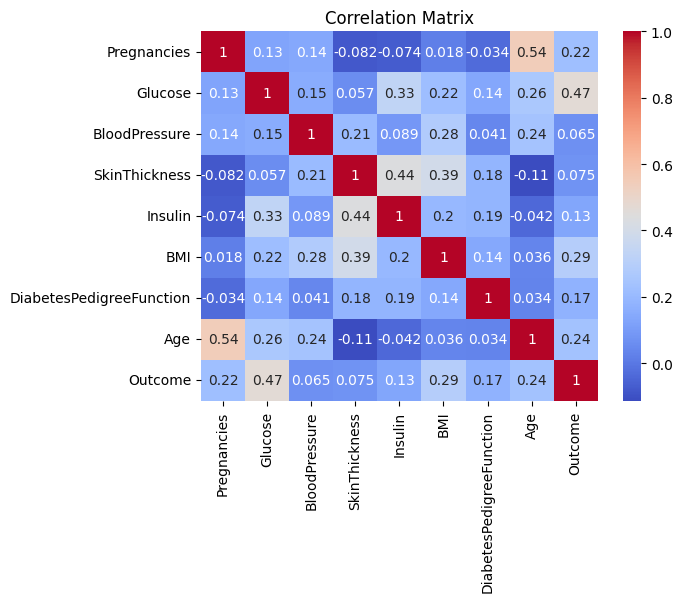

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<br>

## **STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

- 3.1. Analysis of numerical variables

As the dataset exclusively comprises **`numerical variables`**, our analysis will concentrate on **univariate exploration**. This will involve examining the distribution, range, and potential outliers of each feature individually. This granular analysis will help us understand the intrinsic characteristics of each variable and lay the groundwork for subsequent modeling steps.

In [46]:
num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

**3.1. ANALYSIS OF NUMERICAL VARIABLES**

In [47]:
df_numerical.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


**Plots histograms and boxplots**:  for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

**Parameters:**
- `df_numerical`: DataFrame containing only the numerical columns to analyze.
- `hue`: Column name for hue (optional). If provided, it must exist in `df_numerical`.
  

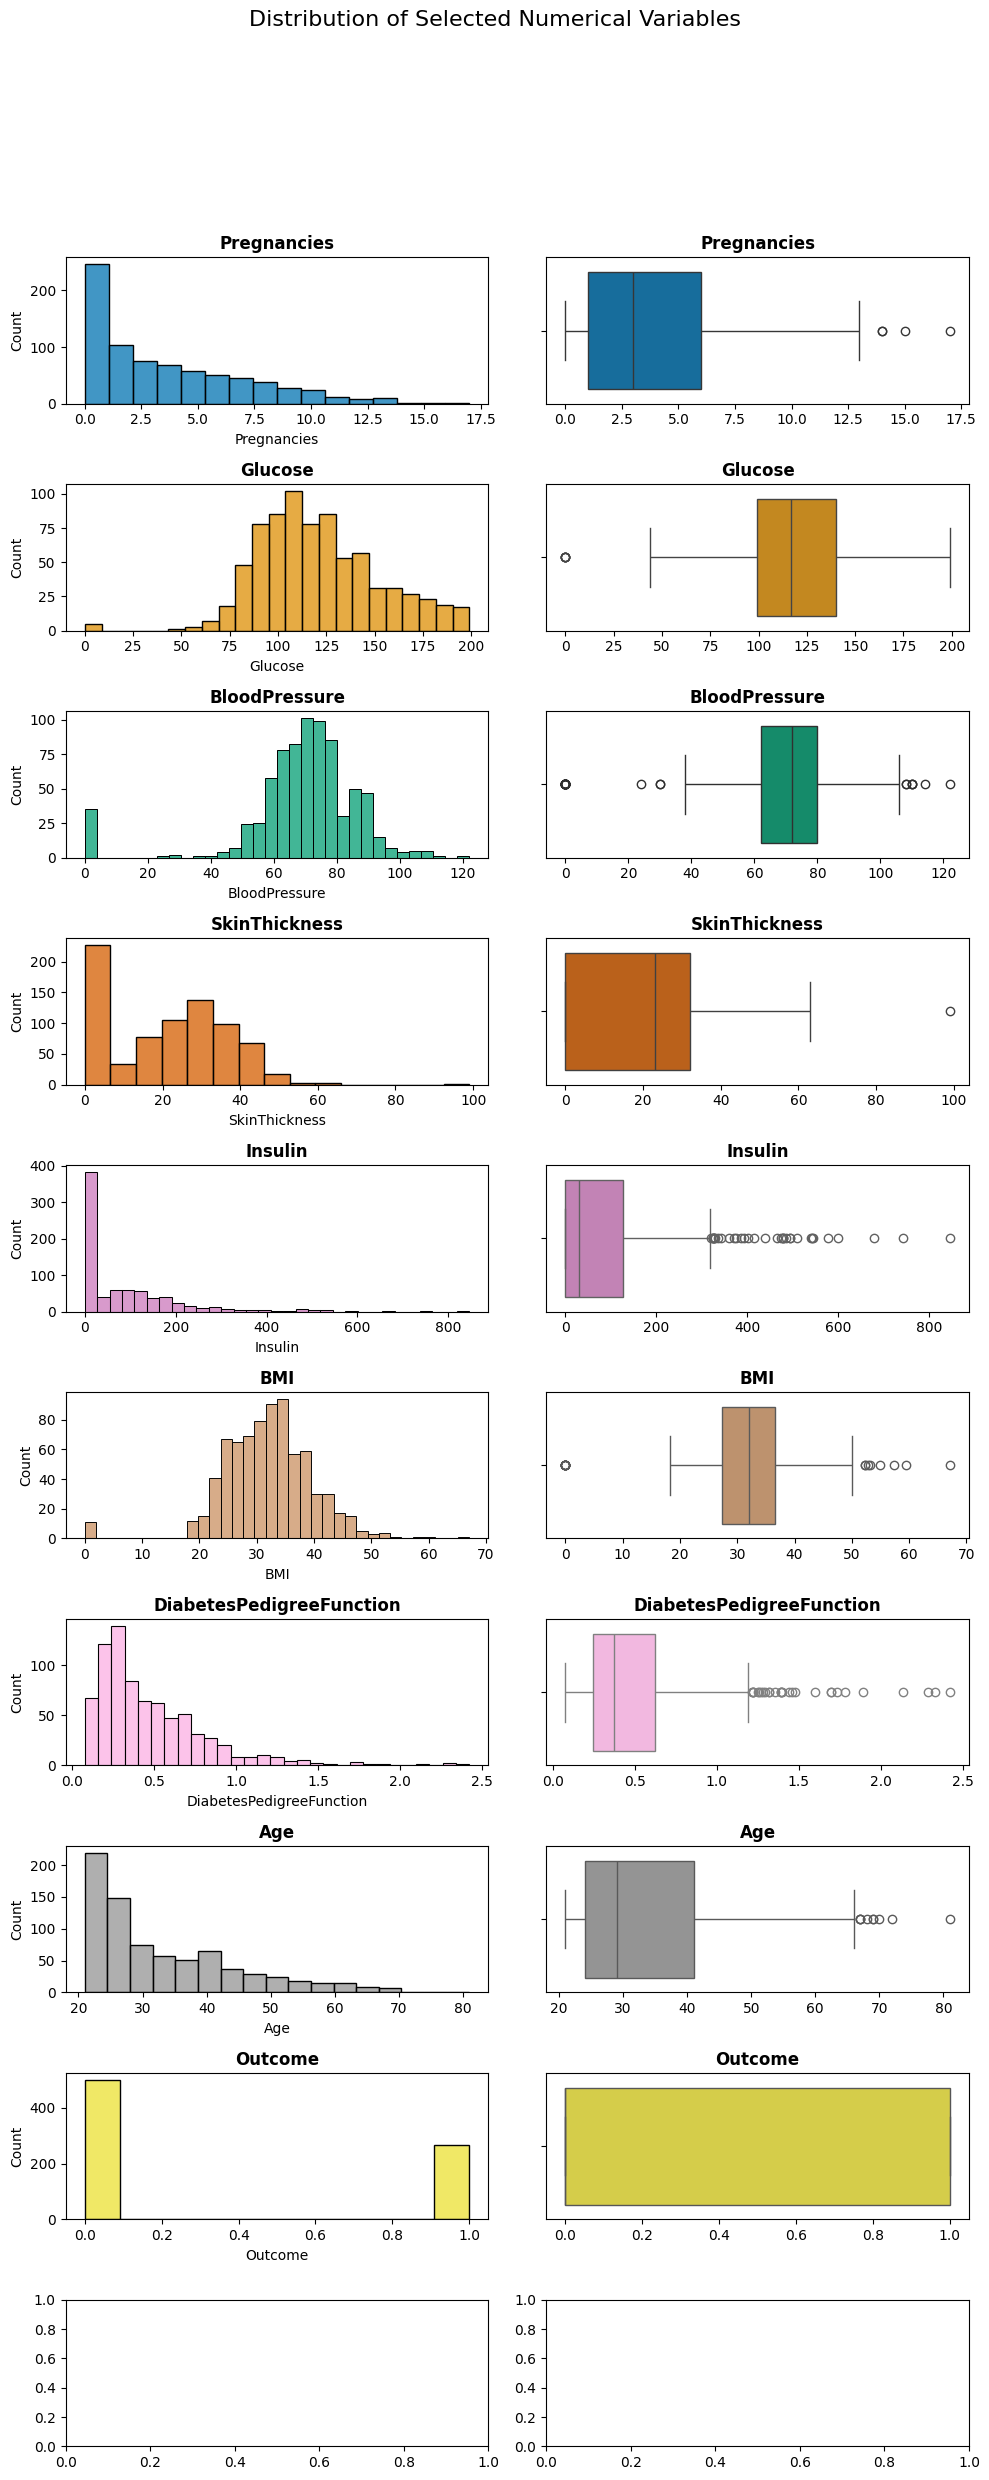

In [48]:
def plot_numerical_variables(df_numerical, hue=None): 

    numerical_columns = df_numerical.columns.tolist()

  
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  

   
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=16, y=1.02)

   
    axes = axes.flatten()

   
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  
        axes[i * 2 + 1].set(xlabel=None)  

  
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_numerical_variables(df_numerical)

**Observations:**


* **Skewed Distributions with Outliers:**
  - `Pregnancies`, `SkinThickness`, `Insulin`, and `DiabetesPedigreeFunction` exhibit non-normal distributions, with a significant number of data points deviating from the central tendency. 
* **Symmetric Distributions with Outliers:**
  - `Glucose` and `BMI` show a more balanced distribution, but still contain outliers that are distant from the majority of data points.
* **Central Tendency with Outliers:**
  - `BloodPressure` and `Age` tend to cluster around a central value, however, there are still instances of data points that are significantly different from the norm.
* **Imbalanced Target Variable:**
  - The `Outcome` variable is not evenly distributed, with a larger proportion of negative cases (0) compared to positive cases (1).

<br>

## **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**

- 4.1. Numerical - Numerical Analysis.
- 4.2. Correlation Matrix

As the dataset **exclusively** comprises `numerical features`, *there's no need for categorical encoding*. This simplifies the preprocessing phase, allowing us to concentrate on numerical data analysis and preparation.

<br>

**4.1. NUMERICAL-NUMERICAL ANALYSIS**

In [49]:
list(df_numerical)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

We'll begin our analysis by generating scatter plots and correlation matrices to examine the relationships between the target variable and our numerical features..

**Parameters:**
- `df`: DataFrame containing the data.
- `target_variable`: String representing the name of the target variable (must be in numerical format).
- `numerical_columns`: List of strings with the names of the numerical columns for analysis.
   

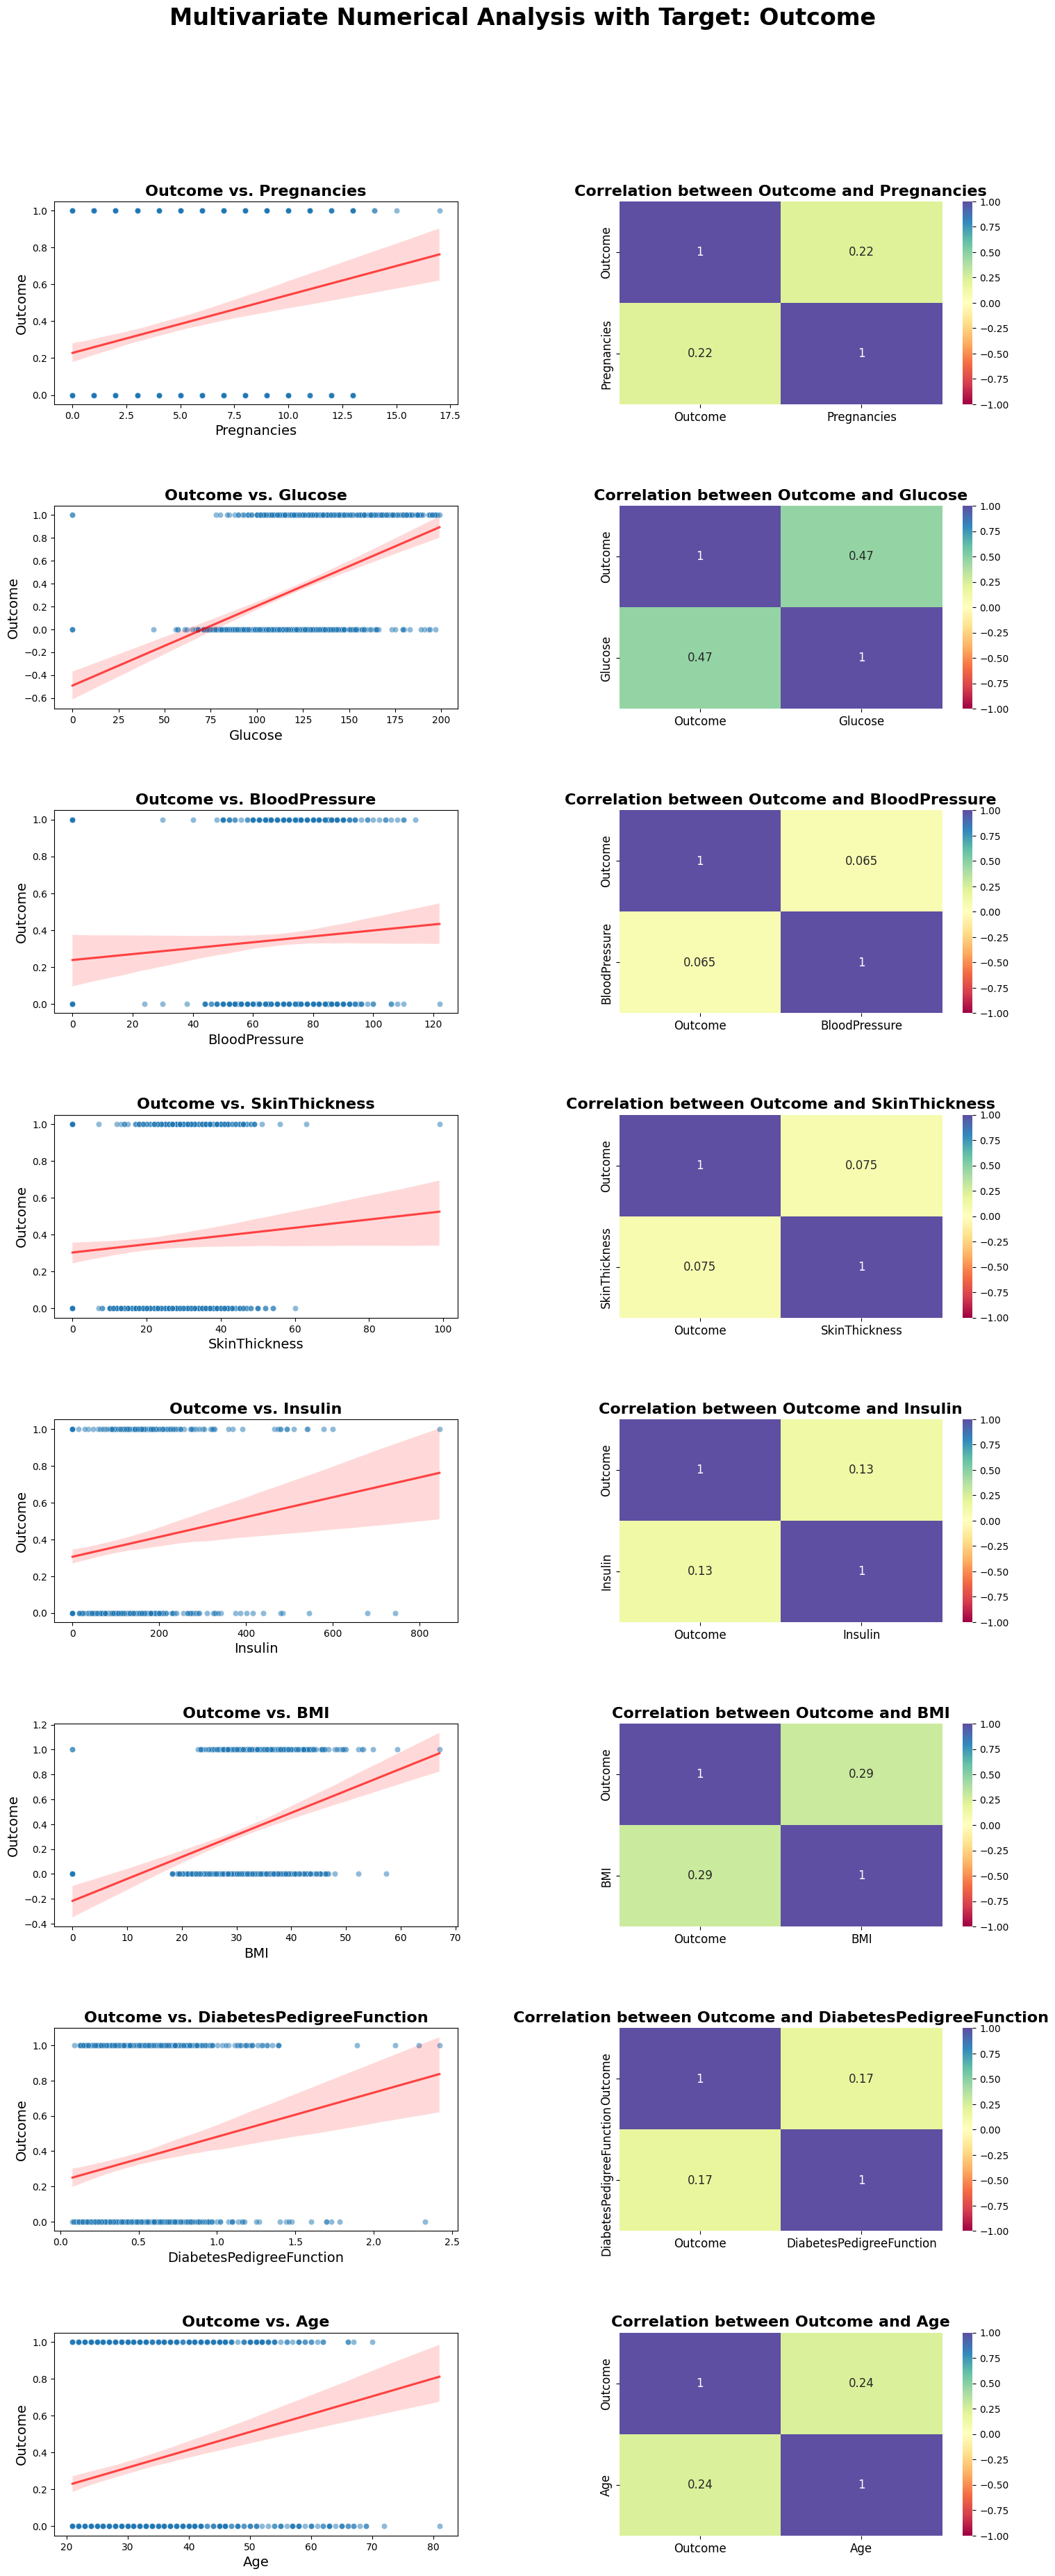

In [50]:
def multivariate_numeric_analysis(df, target_variable, numerical_columns):

    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(18, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=24, fontweight='bold', y=1.02)
    
  
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=df, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=df, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=16, fontweight='bold')
        axes[i, 0].set_xlabel(col, fontsize=14)
        axes[i, 0].set_ylabel(target_variable, fontsize=14)
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = df[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1, annot_kws={"size": 12})
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=16, fontweight='bold')
        axes[i, 1].tick_params(axis='both', which='major', labelsize=12)


    plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.4)
    plt.show()

numerical_columns = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
target_variable = 'Outcome'
multivariate_numeric_analysis(df, target_variable, numerical_columns)

**Multivariate Numerical Analysis: Predicting Diabetes**

The provided visualizations present a multivariate numerical analysis focused on predicting diabetes. The analysis examines the relationships between a binary target variable, `Outcome` (0: no diabetes, 1: diabetes), and several numerical features, including `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age`. Scatter plots and correlation matrices have been used to visualize these relationships.

**Variable-by-Variable Analysis**

* **Pregnancies:** A slightly positive linear relationship exists, suggesting a weak positive correlation.
* **Glucose:** A strong positive linear relationship is evident, indicating that higher glucose levels are strongly associated with a higher probability of having diabetes.
* **BloodPressure:** A weak positive correlation is observed.
* **SkinThickness:** A weak positive correlation is observed.
* **Insulin:** A weak positive correlation is observed.
* **BMI:** A strong positive linear relationship is evident.
* **DiabetesPedigreeFunction:** A moderate positive correlation is observed.
* **Age:** A weak positive correlation is observed.

**Summary of Key Findings**
* **Glucose and BMI:** These two variables exhibit the strongest positive correlations with the `Outcome` variable.
* **Pregnancies and DiabetesPedigreeFunction:** These variables also show positive correlations.
* **BloodPressure, SkinThickness, Insulin, and Age:** While these variables show some positive correlation, the relationships are weaker.

<br>

**4.2. CORRELATION MATRIX**

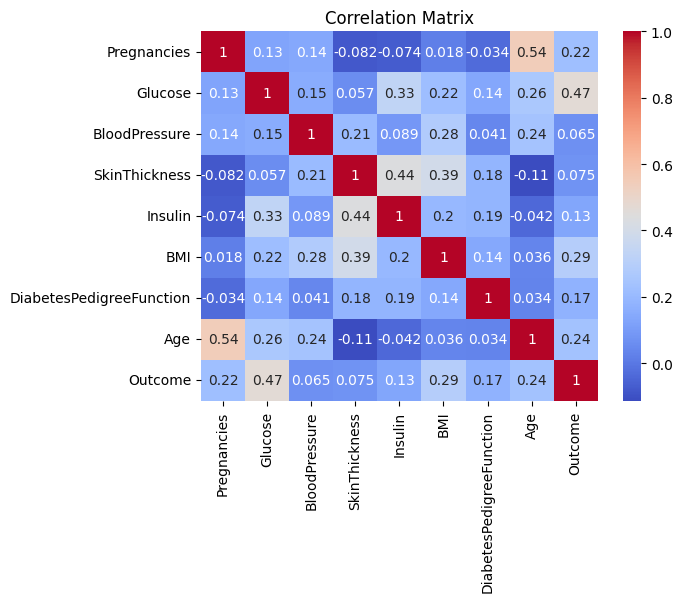

In [51]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix Analysis**

The provided correlation matrix visualizes the relationships between various `numerical features` and the **binary target variable**, `Outcome` (indicating the presence or absence of diabetes), in a dataset related to diabetes prediction.

**Key Findings**

**Strong Positive Correlations:**
* **`Glucose` and `BMI`:** These variables exhibit the strongest positive correlation with the `Outcome` variable, suggesting that higher glucose levels and BMI are significant risk factors for developing diabetes. This finding aligns with well-established medical knowledge.
* **`Pregnancies` and `Age`:** These variables also show moderate to strong positive correlations with the `Outcome`, indicating that increasing age and a history of pregnancies are associated with a higher risk of diabetes.
* **`DiabetesPedigreeFunction`:** There is a moderate positive correlation between this feature and the `Outcome`, suggesting a familial predisposition to diabetes.

**Weak to Moderate Positive Correlations:**
* **`BloodPressure` and `SkinThickness`:** While there is a positive correlation between these variables and the `Outcome`, the relationships are relatively weak. This suggests that while blood pressure and skin thickness might contribute to the risk of diabetes, their impact is less pronounced compared to glucose and BMI.
* **`Insulin`:** The correlation between insulin levels and diabetes is somewhat weak, which might be due to various factors such as insulin resistance or other underlying metabolic conditions.

**Negative Correlations:**
* **`SkinThickness` and `Insulin`:** There is a weak negative correlation between these two variables. This could be due to factors such as insulin resistance or other metabolic imbalances.

**Implications and Further Analysis**
* **Feature Importance:** The correlation matrix highlights the importance of glucose and BMI as key predictors of diabetes. These variables should be given priority in any predictive modeling efforts.

<br>

# **STEP 5: FEATURE ENGINEERING**

- 5.1. Outlier analysis
- 5.2. Missing Values
- 5.3. Split TRAIN/TEST of both Dataframes
- 5.4. Normalization
- 5.5. min-MAX Scaling

<br>

**5.1. OUTLIER ANALYSIS**

In [52]:
df_stats = df.describe()
df_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
outlier_variables = list(df_numerical)

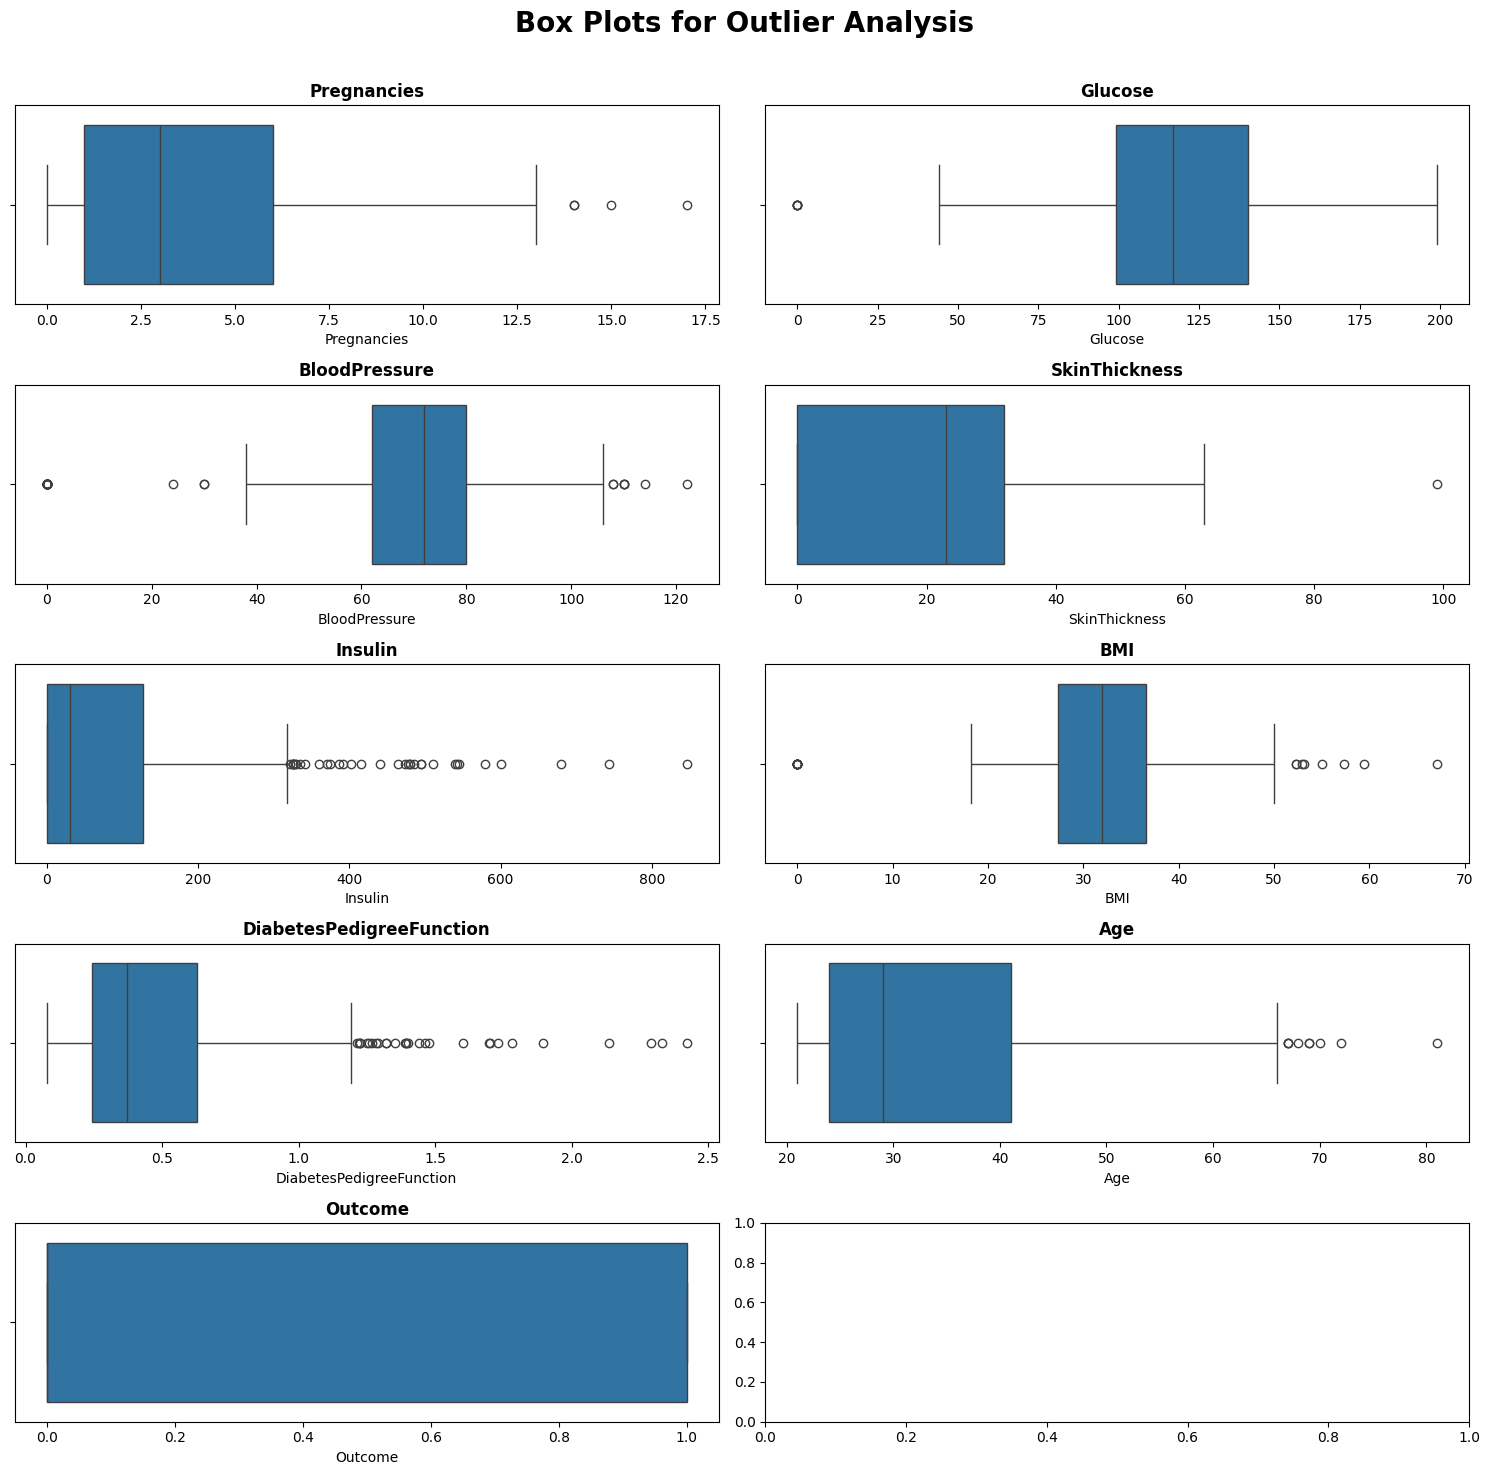

In [54]:
num_vars = len(outlier_variables)
num_rows = math.ceil(num_vars / 2)  

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))
fig.suptitle('Box Plots for Outlier Analysis', fontsize=20, fontweight='bold')


for i, var in enumerate(outlier_variables):
    row, col = divmod(i, 2)  
    sns.boxplot(ax=axes[row, col], data=df, x=var)
    axes[row, col].set_title(var, fontweight='bold')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**OBSERVATIONS:** We will calculate outlier limits for variables exhibiting significant outliers, namely `BloodPressure` and `DiabetesPedigreeFunction`. These limits will be used to create a new, outlier-free DataFrame (`df_without_outliers`). Both the original DataFrame (with outliers) and the outlier-free DataFrame will be used to train the model. By comparing the model

In [55]:
df_with_outliers = df.copy()
df_without_outliers = df.copy()

In [56]:
def remove_outliers(x, feature_name, allow_neg=True):
 
    safe_feature_name = feature_name.replace("%", "percent").replace("/", "_").replace(" ", "_")

    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda val: upper_lim if val > upper_lim else (lower_lim if val < lower_lim else val))


    filename = f'../data/interim/outliers_lims_{safe_feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [57]:
outlier_variables = [
    'BloodPressure',
    'DiabetesPedigreeFunction'
]

In [58]:
for feature in outlier_variables:
    df_without_outliers[feature] = remove_outliers(df_without_outliers[feature], feature_name=feature, allow_neg=False)

In [59]:
df_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df_without_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,1.200,33,1


<br>

**5.2. MISSING VALUES**

In [61]:
df_without_outliers.isna().sum()[df_with_outliers.isna().sum()>0]

Series([], dtype: int64)

In [62]:
df_with_outliers.isna().sum()[df_with_outliers.isna().sum()>0]

Series([], dtype: int64)

**OBSERVATIONS:** The treatment data is free from missing values

<br>

**5.3. SPLIT TRAIN/TEST OF BOTH DATAFRAME**

We will proceed to split a DataFrame into training and testing sets for model development.
    
**Parameters:**
- `target`: str, the name of the target column to be predicted
- `df`: DataFrame, the complete DataFrame to split
- `test_size`: float, proportion of the data to allocate to the test set (default is 0.2)
- `random_state`: int, sets the seed for reproducibility (default is 123)

**Returns:**
- `X_train, X_test`: DataFrames containing the training and testing features
- `y_train, y_test`: Series containing the training and testing target values


In [63]:
def split(target, df, test_size=0.2, random_state=123):

    X = df.drop(columns=target)  
    y = df[target]               

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [64]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_with_outliers)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_without_outliers)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [65]:
# View train and test data for verification
X_train_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66,39,140,38.1,0.150,28
313,3,113,50,10,85,29.5,0.626,25
195,5,158,84,41,210,39.4,0.395,29
570,3,78,70,0,0,32.5,0.270,39
226,0,101,76,0,0,35.7,0.198,26


In [66]:
X_train_without_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66.0,39,140,38.1,0.150,28
313,3,113,50.0,10,85,29.5,0.626,25
195,5,158,84.0,41,210,39.4,0.395,29
570,3,78,70.0,0,0,32.5,0.270,39
226,0,101,76.0,0,0,35.7,0.198,26


In [67]:
y_test.head()

236    1
395    0
36     0
210    0
483    0
Name: Outcome, dtype: int64

<br>

**5.4. NORMALIZATION**

We are going to normalize the data using StandardScaler and save the scaler for future use.

**Parameters:**
- `X_train`: DataFrame with the training data
- `X_test`: DataFrame with the testing data
- `filename`: string, the name of the file to save the scaler

**Returns:**
- `X_train_norm`: DataFrame with the normalized training data
- `X_test_norm`: DataFrame with the normalized testing data


In [75]:
def normalize_and_save(X_train, X_test, filename):

    # Initialize and adjusts the scaler
    scaler = StandardScaler()
    scaler.fit(X_train)  

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)

<br>

**5.5 min-MAX SCALING**

We'll apply Min-Max Scaling to the data and save the scaler for future use.

**Parameters:**
- `X_train`: DataFrame with the training data
- `X_test`: DataFrame with the testing data
- `filename`: string, the name of the file to save the scaler

Returns:
- `X_train_minmax`: DataFrame with the scaled training data
- `X_test_minmax`: DataFrame with the scaled testing data



In [76]:
def minmax_and_save(X_train, X_test, filename):

    scaler = MinMaxScaler()
    scaler.fit(X_train) 

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)


<br>

# **STEP 6: FEATURE SELECTION**

- 6.1. Applying the filter to the normalized and minmax scaled data frames
- 6.2. Saving the CSV files

<br>

<br>

We'll apply feature selection using SelectKBest and save the model for future use.

**Parameters:**
- `X_train`: DataFrame with training data
- `X_test`: DataFrame with testing data
- `y_train`: Series with target training data
- `k`: Number of features to select
- `filename`: String, the name of the file to save the selection model

**Returns:**
- `X_train_sel`: DataFrame with selected features from training data
- `X_test_sel`: DataFrame with selected features from testing data

  

In [77]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
  
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    selected_columns = X_train.columns[selection_model.get_support()]

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

  
    joblib.dump(selection_model, f'../data/processed/{filename}.sav')

    return X_train_sel, X_test_sel

# Application of the function to select features with and without outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection_and_save(
    X_train_with_outliers, X_test_with_outliers, y_train, 6, 'selection_model_with_outliers'
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection_and_save(
    X_train_without_outliers, X_test_without_outliers, y_train, 6, 'selection_model_without_outliers'
)

<br>

**6.1 APPLYING THE FILTER TO THE NORMALIZED AND minMAX SCALED DATAFRAMES**

In [78]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

<br>

**6.2. SAVING THE CSV FILES**

In [79]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

# **STEP 7: MACHINE LEARNING**

- 7.1. Choosing the best Dataset
- 7.2. Optimizing the Decision Tree
- 7.3. Saving Model

<br>

**7.1. CHOOSING THE BEST DATASET**

- Wich is the best Dataset?

In [80]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [81]:
results_DecisionTree = []

# Loop through the training/test sets
for name, X_train in dfs_train.items():
    X_test = dfs_test[name.replace('train', 'test')]


    DecisionTree_model = DecisionTreeClassifier(random_state=28)
    DecisionTree_model.fit(X_train, y_train)
    y_pred = DecisionTree_model.predict(X_test)

    
    results_DecisionTree.append(
        {
            "Dataset": name,
            "Accuracy Score": round(accuracy_score(y_test, y_pred), 4),
            "Precision": round(precision_score(y_test, y_pred), 4),
            "Recall": round(recall_score(y_test, y_pred), 4),
            "F1-Score": round(f1_score(y_test, y_pred), 4),
            "Model": DecisionTree_model 
        }
    )


best_result = max(results_DecisionTree, key=lambda x: x["Accuracy Score"])

print("Best Decision Tree Result:")
print(f"Dataset: {best_result['Dataset']}")
print(f"Accuracy: {best_result['Accuracy Score']:.4f}")
print(f"Precision: {best_result['Precision']:.4f}")
print(f"Recall: {best_result['Recall']:.4f}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")
print(f"Model: {best_result['Model']}")

Best Decision Tree Result:
Dataset: X_train_with_outliers_sel
Accuracy: 0.7468
Precision: 0.6557
Recall: 0.6897
F1-Score: 0.6723
Model: DecisionTreeClassifier(random_state=28)


<br>

**7.2. OPTIMIZING THE DECISION TREE**

By employing GridSearchCV, we aim to tune the hyperparameters of our model to achieve maximum performance.

In [82]:
# Define hyperparameters for optimization
param_grid = {
    'criterion': ['gini', 'entropy', "log_loss"],  
    "max_depth": [None, 10, 15, 20, 25, 30, 35],
    "min_samples_split": [2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.01, 0.015, 0.025, 0.05, 0.075, 0.1]  
}

# GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=28), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model & Results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1}
Best Accuracy: 0.750859656137545
Test Accuracy (Best Model): 0.7532467532467533


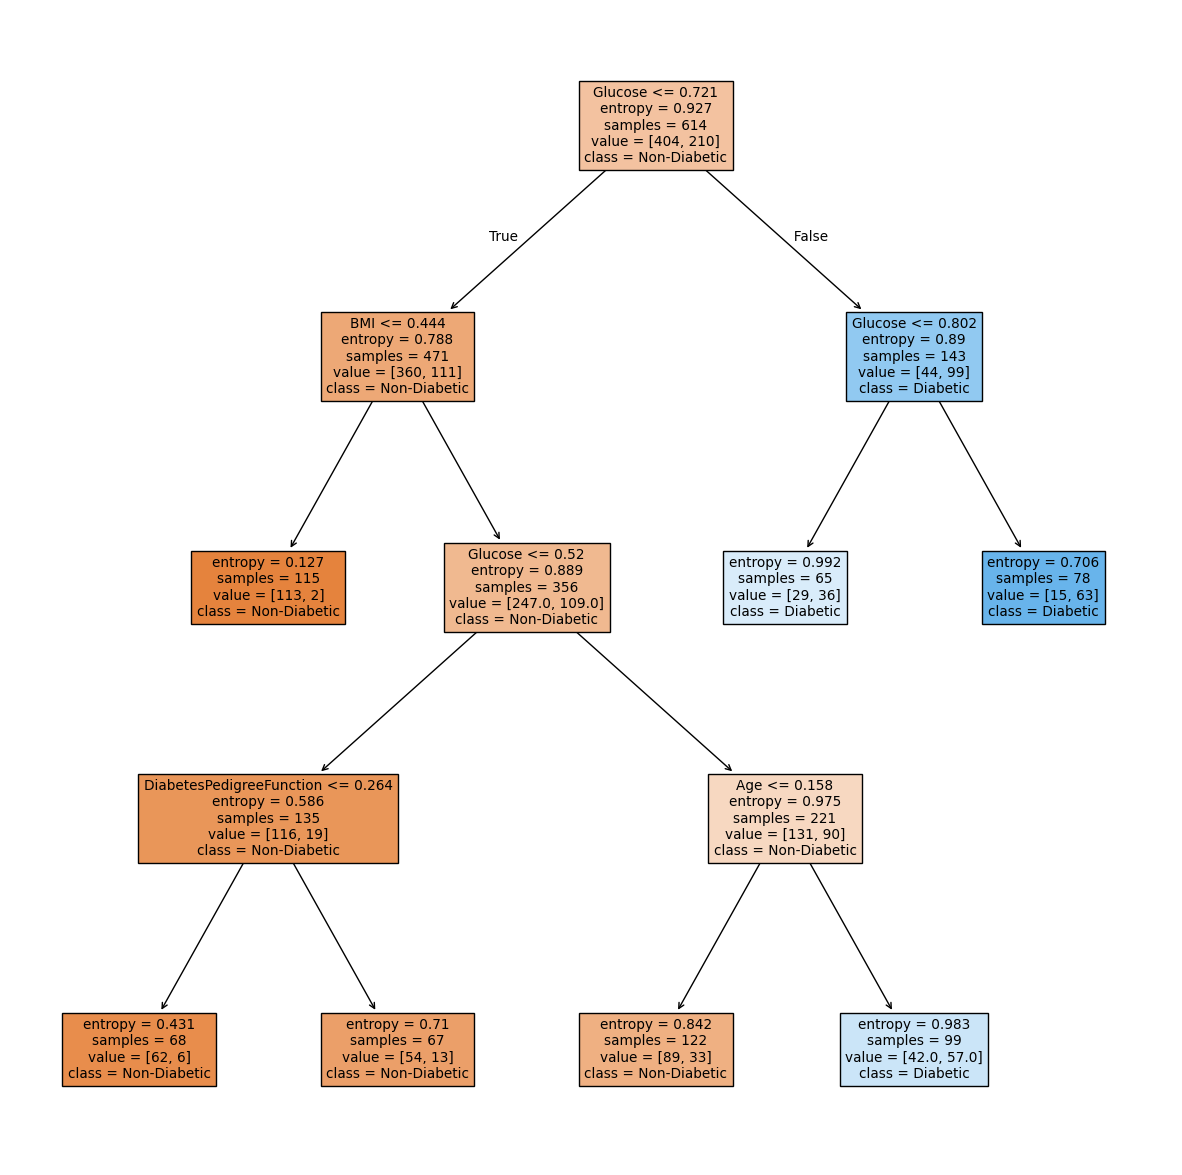

In [83]:
plt.figure(figsize=(15, 15))
plt.title(f"Decision Tree for Best Model (Optimized)")
tree.plot_tree(
    best_model,
    feature_names= X_train_with_outliers_sel.columns,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True
)
plt.show()

**OBSERVATIONS:** This graph suggests that `Glucose` and `BMI` have the most substantial impact on the prediction of diabetes.

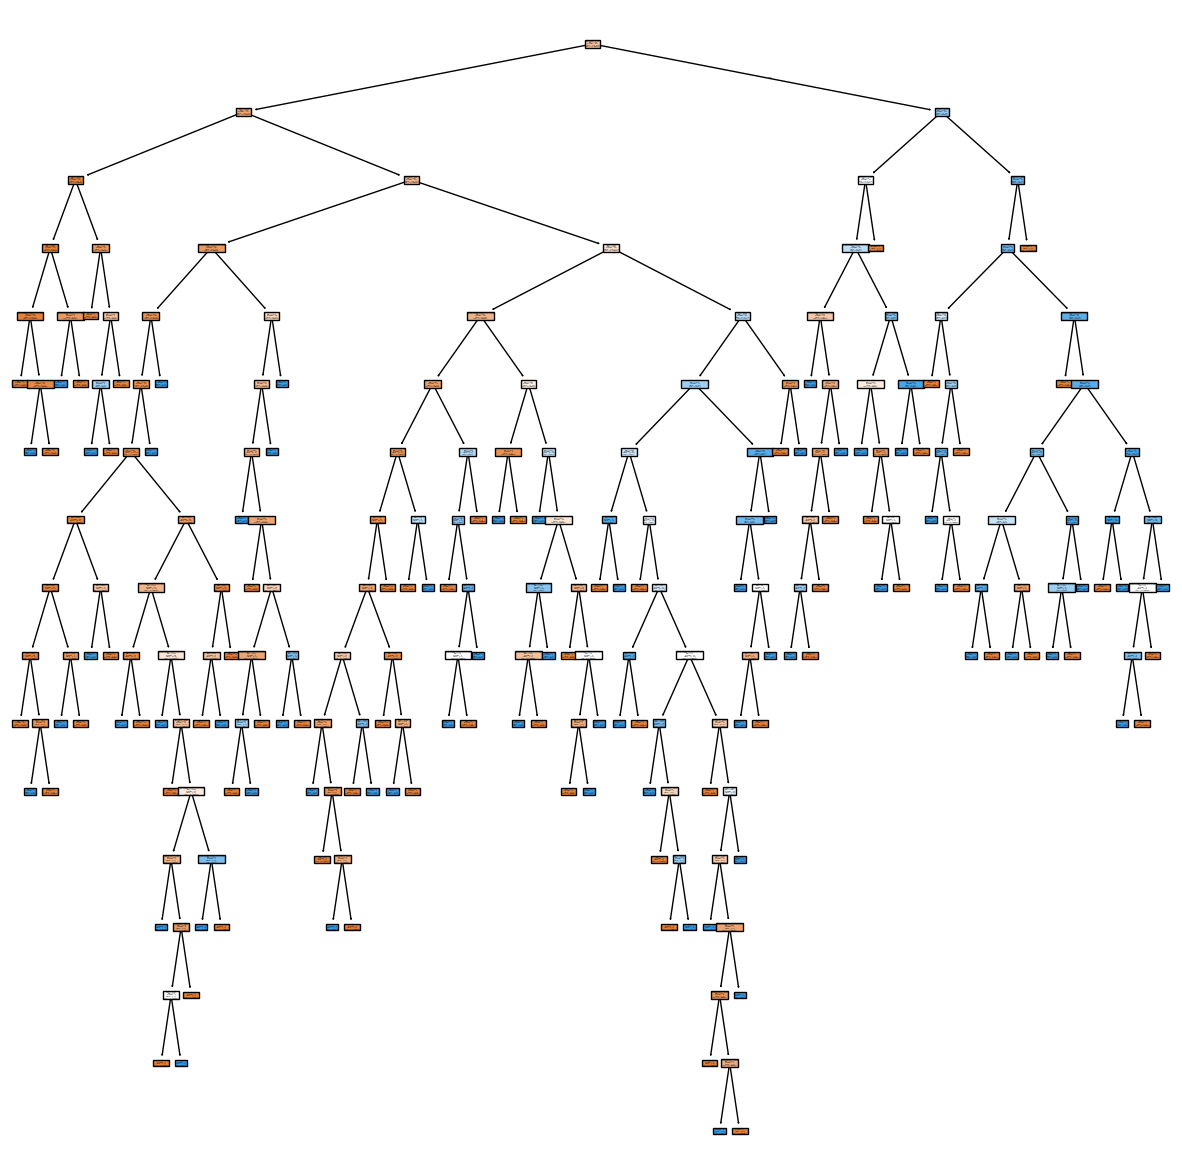

In [84]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(DecisionTree_model, feature_names = X_train_with_outliers_sel.columns, class_names = ["Non-Diabetic", "Diabetic"], filled = True)

plt.show()

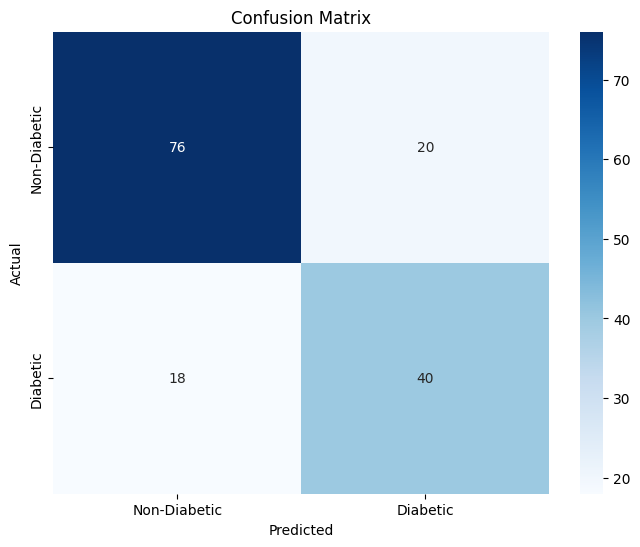

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**FINDINGS:**

* **True Positives (TP):(40).**  This means the model correctly predicted 40 instances where the patient actually had diabetes.
* **True Negatives (TN): (76)**. This means the model correctly predicted 76 instances where the patient did not have diabetes.
* **False Positives (FP): (20).** This means the model incorrectly predicted 20 instances as positive (having diabetes) when the actual condition was negative (no diabetes). These are also known as Type I errors.
* **False Negatives (FN): (18).** This means the model incorrectly predicted 18 instances as negative (not having diabetes) when the actual condition was positive (having diabetes). These are also known as Type II errors.

**Performance Metrics:**

* **Accuracy:** (TP+TN)/(TP+TN+FP+FN) = (40+76)/(40+76+20+18) = 0.76. This means the model is correct 76% of the time.
* **Precision:** TP/(TP+FP) = 40/(40+20) = 0.67. This means that when the model predicts a positive result, it is correct 67% of the time.
* **Recall:** TP/(TP+FN) = 40/(40+18) = 0.69. This means that the model is able to identify 69% of the actual positive cases.
* **F1-Score:** 2*(Precision*Recall)/(Precision+Recall) = 2*(0.67*0.69)/(0.67+0.69) = 0.68. The F1-score is the harmonic mean of precision and recall, providing a single metric to measure a model's performance.


<br>

**7.3. SAVING MODEL**

In [86]:
with open('decision_tree_diabetes_optimized_28.sav', 'wb') as file:
    pickle.dump(best_model, file)

print("Success! The model has been saved.")

Success! The model has been saved.


<br>

# **STEP 8: CONCLUSIONS** 

<br>

## **FINAL STATEMENT: EDA ON EARLY DIABETES DETECTION**


### **Objective**
The primary objective of this study is to develop a robust machine learning model capable of accurately predicting the onset of diabetes based on a comprehensive set of diagnostic measures.

By leveraging a decision tree algorithm, we aim to identify key features that significantly contribute to diabetes risk and construct a transparent and interpretable model.

The ultimate goal is to provide healthcare professionals with a valuable tool for early detection and intervention, thereby improving patient outcomes and reducing the burden of diabetes.

* **Identify key features:** Determine which diagnostic measures are most predictive of diabetes.
* **Build a robust model:** Create a model that can effectively classify individuals as diabetic or non-diabetic.
* **Provide insights:** Gain a deeper understanding of the factors contributing to diabetes and the relationships between them.

<br>

---

## **Research Questions**

- Which diagnostic measures are the most influential in predicting diabetes?
- How well does a decision tree algorithm perform in classifying individuals as diabetic or non-diabetic?
- Can the decision tree model provide insights into the underlying relationships between the features and the target variable?
- To what extent can the model be used as a decision support tool for healthcare providers?

<br>

---
## **Methodology: Desicion Tree Algorithm**
A decision tree algorithm was employed to construct the predictive model. Decision trees offer several advantages, including:

* **Interpretability:** The model's decision-making process is transparent, allowing for easy understanding.
* **Handling of mixed data:** Both numerical and categorical data can be handled effectively.
* **Feature importance:** The algorithm provides a ranking of features based on their contribution to the model's accuracy.

<br>

---
### **Results**
* **Feature Importance:**
   * **`Glucose levels`:** As expected, glucose levels emerged as the most significant predictor of diabetes.
   * **`Body Mass Index (BMI)`:** BMI was also identified as a critical factor, highlighting the association between obesity and diabetes.

* **Model Performance:**
   * **Accuracy:** (TP+TN)/(TP+TN+FP+FN) = (40+76)/(40+76+20+18) = 0.76. **This means the model is correct 76% of the time**.
   * **Precision:** TP/(TP+FP) = 40/(40+20) = 0.67. **This means that when the model predicts a positive result, it is correct 67% of the time**.
   * **Recall:** TP/(TP+FN) = 40/(40+18) = 0.69. **This means that the model is able to identify 69% of the actual positive cases**.
   * **F1-score:**  2*(Precision*Recall)/(Precision+Recall) = 2*(0.67*0.69)/(0.67+0.69) = **0.68**. The F1-score is the harmonic mean of precision and recall, providing a single metric to measure a model's performance.


* **Decision Tree Visualization:** Based on the confusion matrix, the model seems to be performing reasonably well. **The accuracy, precision, recall, and F1-score are all above 0.6, indicating a decent level of performance**. However, there is room for improvement, especially in terms of reducing the number of false positives and false negatives.

<br>

---
### **Insights and Implications**
* **Feature Interactions:** The decision tree revealed interesting interactions between features, such as the combined effect of age and family history on diabetes risk.
* **Decision Boundaries:** The decision boundaries clearly demarcated the regions in the feature space corresponding to different classes, providing insights into the model's decision-making process.
* **Clinical Implications:** The model can be used as a decision support tool for healthcare providers, assisting in the early identification of individuals at high risk of developing diabetes. This enables timely interventions and potentially improves patient outcomes.

### **Limitations and Future Work**
* **Data Limitations:** The model's performance is dependent on the quality and representativeness of the dataset.
* **Overfitting:** There is a risk of overfitting, especially when dealing with a limited dataset. Techniques such as pruning or regularization can mitigate this issue.
* **Dynamic Nature of Diabetes:** Diabetes is a complex disease with varying progression rates. Future research could explore the use of time-series analysis to capture the dynamic nature of the disease.

**Future Directions:**

* **Ensemble Methods:** Explore ensemble techniques like random forests or gradient boosting for potentially improved performance.
* **Feature Engineering:** Investigate the impact of additional feature engineering techniques on model accuracy.
* **Clinical Validation:** Conduct a larger-scale clinical validation to assess the model's performance in a real-world setting.
* **Incorporating Time-Series Data:** Consider using time-series analysis to model the progression of diabetes over time.

<br>

---
# **CONCLUSION**
This study has demonstrated the potential of decision tree algorithms for early diabetes detection. By identifying key risk factors and developing a predictive model, we have taken a significant step towards improving diabetes prevention and management. Future research should focus on addressing the limitations of this study and exploring more advanced machine learning techniques.

<br>

<br>